In [1]:
# Import all required libraries
import warnings

#Ignoring unnecessary warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import nltk

In [3]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [5]:
# Here, I have to divide HelpfulnessNumerator with HelpfulnessDenominator by using the Numpy.
# If HelpfulnessDenominator is greater than 0, divide the numerator with denominator.
# If the HelpfulnessDenominator is not greater than 0, append -1 to the own data.
df['Helpful%']=np.where(df['HelpfulnessDenominator']>0, df['HelpfulnessNumerator']/df['HelpfulnessDenominator'], -1)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [7]:
df['Helpful%'].unique()
# These are the values ranging from -1 to +1.

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [8]:
df['%upvote']=pd.cut(df['Helpful%'], bins=[-1,0,0.2,0.4,0.6,0.8,1], labels=['Empty','0-20%','20-40%','40-60%','60-80%','80-100%'])
# Here, I have made the slices of the Helpful% feature into some values above.

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
# Analysing upvotes for different scores
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful%  
Score %upvote                                                             
1     Empty                      8060    8060     8060    8060      8060  
      0-20%                      2338    2338     2338    2338      2338  
      20-40%                     4649    4649     4649    4649      4649  
      40-60%                     6586    6586     6586    6586      6586  
      60-80%                     5838    5838     5838    5838      5838  
      80-100%                   12531   12531    12531   12531     12531  
2     Empty                      4234    4234     4234    4234      4234  
      0-20%                       762     762      737     762       762  
      20-40%                     1618    1618     1618    1618      1618  
      40-60%                     3051    3051     3051    3051      3051  
      60-80%                     2486    2486     2486    2486      2486  
      80-100%                    7014    7014     7014    7014      7014  
3     Empty                      5062    5062     5062    5062      5062  
      0-20%                       474     474      474     474       474  
      20-40%                     1506    1506     1506    1506      1506  
      40-60%                     3384    3384     3384    3384      3384  
      60-80%                     2754    2754     2754    2754      2754  
      80-100%                   11037   11037    11036   11037   

In [11]:
df_s = df.groupby(['Score','%upvote']).agg({'Id':'count'}).reset_index()

In [12]:
df_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


In [13]:
pivot = df_s.pivot(index='%upvote',columns='Score')

In [14]:
pivot

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

In [15]:
df.shape

(568454, 12)

In [16]:
import seaborn as sns

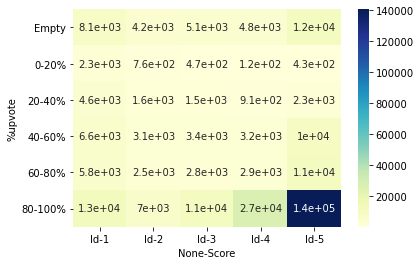

In [17]:
sns.heatmap(data=pivot,annot=True, cmap='YlGnBu')

In [18]:
# Applying bag of words on the data to convert text data into some integer/float format.
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [19]:
df2 = df[df['Score']!=3]

In [20]:
X = df2['Text']

In [21]:
df2['Score'].unique()

array([5, 1, 4, 2], dtype=int64)

In [22]:
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df2['Score'].map(y_dict)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
c = CountVectorizer(stop_words='english')

In [25]:
X_c = c.fit_transform(X)

In [26]:
X_c.shape

(525814, 114969)

In [27]:
#Checking the Model accuracy
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

In [29]:
X_train.shape

(394360, 114969)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log = LogisticRegression()

In [32]:
ml = log.fit(X_train, y_train)

In [33]:
ml.score(X_test, y_test)

0.9368296134008854

In [34]:
# Now, fetching top 20 positive words and top 20 negative words.
w = c.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [35]:
coef = ml.coef_.tolist()[0]
coef

[-0.31068174610963634,
 -0.02500845046652209,
 0.5137996261226229,
 -0.009643881916935469,
 -0.010330764108467675,
 -0.012792236717174055,
 0.0003436536001331713,
 -0.01107976702705863,
 0.0004287736199702464,
 0.0,
 0.0,
 -0.014960038808316062,
 0.004568593925439697,
 0.01546573942529474,
 -0.23419266951349113,
 0.0007236793166429057,
 0.0028286310589744736,
 0.004709521321981759,
 0.002038193259810904,
 0.0,
 -0.05658182197961885,
 0.015812631068289826,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 0.0380004402467885,
 -0.0003881364543067825,
 0.05250415254171395,
 0.0,
 0.0,
 -0.0005196727163592671,
 0.0001482803059105735,
 0.002902892756007239,
 0.14102543284844504,
 0.0,
 -0.12326454453618743,
 0.013180348410631813,
 0.00011278962805991004,
 0.006002846298507793,
 -0.066581780754035,
 0.00011553753315684067,
 0.008754543012569067,
 4.2502684390072453e-05,
 0.0

In [36]:
coef_df = pd.DataFrame({'Word':w, 'Coefficient':coef})
coef_df

,Word,Coefficient
0,00,-0.310682
1,000,-0.025008
2,0000,0.513800
3,000001,-0.009644
4,00001,-0.010331
...,...,...
114964,çaykur,0.000971
114965,çelem,-0.118193
114966,être,0.019788
114967,île,0.011164


In [37]:
coef_df = coef_df.sort_values(['Coefficient','Word'], ascending=False)
coef_df

,Word,Coefficient
80600,pleasantly,3.942369
39072,downside,3.543666
5865,addicting,3.177530
94667,skeptical,2.823330
35726,delish,2.512231
...,...,...
88945,ripoff,-3.029090
113164,worst,-3.127569
106852,unacceptable,-3.298979
34989,deceptive,-3.631790


In [38]:
print("-Top 20 Positive-")
print(coef_df.head(20).to_string(index=False))
print('/n')
print("-Top 20 Negative-")
print(coef_df.tail(20).to_string(index=False))

-Top 20 Positive-
       Word  Coefficient
 pleasantly     3.942369
   downside     3.543666
  addicting     3.177530
  skeptical     2.823330
     delish     2.512231
     resist     2.363781
     hooked     2.340585
   hesitant     2.285760
      penny     2.213675
      beats     2.184076
    worries     2.173044
    easiest     2.130948
   soothing     2.118193
 economical     2.106507
       whim     2.097792
   relaxing     2.051024
  delighted     2.039345
    awesome     2.029283
  excellent     2.011554
   drawback     1.979141
/n
-Top 20 Negative-
           Word  Coefficient
         bummer    -2.409096
 disappointment    -2.411103
    embarrassed    -2.456814
      disgusted    -2.470731
     overpowers    -2.480738
    unappealing    -2.484341
          lousy    -2.525513
    disapointed    -2.569064
     returnable    -2.593835
        defeats    -2.614653
      cancelled    -2.670774
         lacked    -2.686472
          blech    -2.703440
  disappointing    -2.959900
 

In [39]:
# the next task is automating the below steps
    # 1. Applying bag of words on the given data
    # 2. Checking Model accuracy
    # 3. Fetching top 20 positive words and top 20 negative words
# Thereby, automate the prediction.

In [40]:
def text_fit(X, y, nlp_model, ml_model, coef_show=1):
    X_c = nlp_model.fit_transform(X)
    print('Features:{}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print("Train records: {}".format(X_train.shape[0]))
    print("Test records: {}".format(X_test.shape[0]))

    ml = ml_model.fit(X_train, y_train)
    acc = ml.score(X_test, y_test)
    print("Model Accuracy:{}".format(acc))
    
    if coef_show == 1:
        w = nlp_model.get_feature_names()
        coef = ml.coef_.tolist()[0]
        coef_df = pd.DataFrame({'Word':w, 'Coefficient':coef})
        coef_df = coef_df.sort_values(['Coefficient','Word'], ascending=[0,1])
        print('/n')
        print('-Top 20 Positive words')
        print(coef_df.head(20).to_string(index=False))
        print('/n')
        print('-Top 20 Negative Words')
        print(coef_df.tail(20).to_string(index=False))

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
c = CountVectorizer(stop_words='english')

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
text_fit(X,y,c,LogisticRegression())

Features:114969
Train records: 394360
Test records: 131454
Model Accuracy:0.9368296134008854
/n
-Top 20 Positive words
       Word  Coefficient
 pleasantly     4.014440
   downside     3.251808
  addicting     3.101375
  skeptical     3.093678
     resist     2.428327
   drawback     2.331502
      saves     2.302891
     hooked     2.283017
    worries     2.223025
     solved     2.185476
   hesitant     2.139700
  excellent     2.111317
     delish     2.081650
        yay     2.045827
       calm     2.035302
   soothing     2.012990
        met     2.005237
    perfect     1.998770
      beats     1.979956
   tastiest     1.979467
/n
-Top 20 Negative Words
           Word  Coefficient
        glowing    -2.321948
        vomited    -2.326170
          blech    -2.354477
     overpowers    -2.373556
         bummer    -2.385594
 disappointment    -2.422076
        defeats    -2.503528
          lousy    -2.537170
     returnable    -2.633371
       mediocre    -2.742113
         la

In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def predict(X,y,nlp_model, ml_model):
    X_c = nlp_model.fit_transform(X)
    print("features: {}".format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print("Train records: {}".format(X_train.shape[0]))
    print("Test records: {}".format(X_test.shape[0]))
    ml = ml_model.fit(X_train, y_train)
    predictions = ml.predict(X_test)
    cm = confusion_matrix(predictions, y_test)
    print(cm)
    acc = accuracy_score(predictions, y_test)
    print(acc)
    cr = classification_report(predictions, y_test)
    print(cr)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
c = CountVectorizer(stop_words = 'english')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [47]:
predict(X,y,c,lr)

features: 114969
Train records: 394360
Test records: 131454
[[ 14813   2720]
 [  5668 108253]]
0.9361906066000274
              precision    recall  f1-score   support

           0       0.72      0.84      0.78     17533
           1       0.98      0.95      0.96    113921

    accuracy                           0.94    131454
   macro avg       0.85      0.90      0.87    131454
weighted avg       0.94      0.94      0.94    131454



In [48]:
# Applying some more NLP techniques and ML models.
from sklearn.dummy import DummyClassifier

In [49]:
c = CountVectorizer()

In [50]:
text_fit(X,y,c,DummyClassifier(),0)

Features:115282
Train records: 394360
Test records: 131454
Model Accuracy:0.8456266070260319


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf = TfidfVectorizer(stop_words='english')

In [53]:
lr = LogisticRegression()

In [54]:
text_fit(X,y,tfidf,lr,0)

Features:114969
Train records: 394360
Test records: 131454
Model Accuracy:0.9351408097129034


In [55]:
predict(X,y,c,lr)

features: 115282
Train records: 394360
Test records: 131454
[[ 15018   2679]
 [  5424 108333]]
0.9383586653886531
              precision    recall  f1-score   support

           0       0.73      0.85      0.79     17697
           1       0.98      0.95      0.96    113757

    accuracy                           0.94    131454
   macro avg       0.86      0.90      0.88    131454
weighted avg       0.94      0.94      0.94    131454



In [56]:
# Data preparation and predicting the upvotes
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [57]:
data = df[df['Score'] == 5]

In [58]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,-1.0,NaN
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,-1.0,NaN
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%


In [60]:
data['%upvote'].unique()

[80-100%, NaN, 60-80%, Empty, 40-60%, 20-40%, 0-20%]
Categories (6, object): [Empty < 0-20% < 20-40% < 40-60% < 60-80% < 80-100%]

In [61]:
data2 = data[data['%upvote'].isin(['0-20%','20-40%', '60-80%','80-100%'])]

In [62]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%
11,12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5,1282867200,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,1.0,80-100%
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,0.8,60-80%


In [70]:
data2['%upvote'].unique()

[80-100%, 60-80%, 20-40%, 0-20%]
Categories (4, object): [0-20% < 20-40% < 60-80% < 80-100%]

In [71]:
X = data2['Text']

In [64]:
y_dict = {'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}
y = data2['%upvote'].map(y_dict)

In [65]:
y.value_counts()

1.0    151721
0.0      2707
Name: %upvote, dtype: int64

In [66]:
# Applying TfIdf on data
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tf = TfidfVectorizer()

In [72]:
X_c = tf.fit_transform(X)

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_c,y,train_size=0.7)

In [74]:
from imblearn.over_sampling import RandomOverSampler

In [75]:
os = RandomOverSampler()

In [76]:
X_train_res, y_train_res = os.fit_resample(X_c, y)

In [77]:
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [78]:
from collections import Counter

In [79]:
print("Original Dataset Shape: {}".format(Counter(y)))
print("Resampled Dataset Shape: {}".format(Counter(y_train_res)))

Original Dataset Shape: Counter({1.0: 151721, 0.0: 2707})
Resampled Dataset Shape: Counter({1.0: 151721, 0.0: 151721})


In [80]:
from sklearn.linear_model import LogisticRegression

In [83]:
log_class = LogisticRegression()

In [84]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

In [87]:
grid = {'C':10.0**np.arange(-2,3), 'penalty':['l1','l2']}

In [82]:
from sklearn.model_selection import GridSearchCV

In [88]:
clf = GridSearchCV(estimator=log_class, param_grid=grid, cv=5, n_jobs=-1, scoring='f1_macro')

In [89]:
clf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_c, y)

In [92]:
pred = clf.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [94]:
confusion_matrix(y_test, pred)

array([[  676,     0],
       [  497, 37434]], dtype=int64)

In [96]:
accuracy_score(y_test, pred)

0.9871266868702567

In [107]:
clf.best_estimator_

LogisticRegression(C=100.0)